# Example 5 - Using xcube to access CUSTOM datasets and experimental zarr 

This notebook shows how to access different data sets through the Sentinel Hub API:


1. Access to a **custom data set** ingested into Sentinel Hub via [**BYOD**](https://www.sentinel-hub.com/bring-your-own-data) mechanism
2. Access to a **experimental zarr**  ingested into Sentinel Hub. 


To run this Notebook, make sure the SENTINEL Hub / xcube Integration is setup correctly, see [Ex0-DCFS-Setup](./Ex0-DCFS-Setup.ipynb).

In [1]:
from xcube_sh.config import CubeConfig
from xcube_sh.cube import open_cube
from xcube_sh.sentinelhub import SentinelHub
import xarray as xr
import numpy as np

## Bring your own data

#### Define bounding box in Mercator coordinates

In [2]:
x1 = 1545577  # meters
y1 = 5761986  # meters
x2 = 1705367  # meters
y2 = 5857046  # meters

bbox = x1, y1, x2, y2

In [3]:
width = 512
spatial_res = (x2 - x1) / width
height = max(1, round((y2 - y1) / spatial_res))

#### Custom data set contains bands RED, GREEN, and BLUE. 

In [4]:
cube_config = CubeConfig(dataset_name='CUSTOM',
                         band_names=['RED', 'GREEN', 'BLUE'],                        
                         tile_size=[width, height],
                         crs='http://www.opengis.net/def/crs/EPSG/0/3857',
                         bbox=bbox,
                         time_range=['2018-01-01', '2019-01-01'],
                         #time_period='7d',
                         spatial_res=spatial_res,
                         band_sample_types='UINT8',
                         collection_id='1a3ab057-3c51-447c-9f85-27d4b633b3f5')

/home/alicja/miniconda3/envs/xcube/lib/python3.9/site-packages/pandas/core/tools/timedeltas.py:132: FutureWarning: Units 'M', 'Y' and 'y' do not represent unambiguous timedelta values and will be removed in a future version
  return _coerce_scalar_to_timedelta_type(arg, unit=unit, errors=errors)


In [5]:
cube = open_cube(cube_config)
cube 

ValueError: Could not determine any valid time stamps

In [37]:
cubew = cube.isel(time=26)

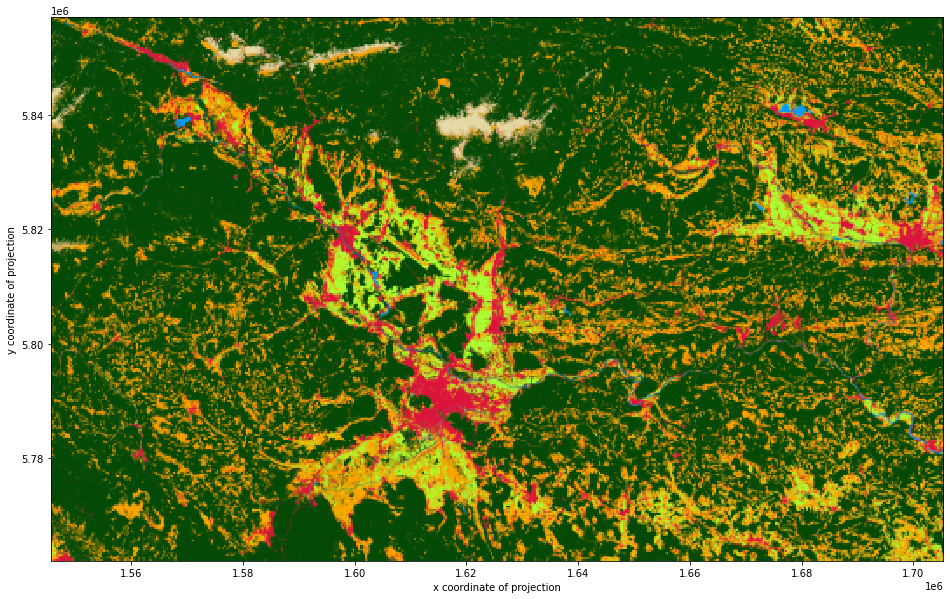

In [38]:
rgb_data = np.zeros((305, 512, 3), 'uint8')
rgb_data[:, :, 0] = cubew.RED.values
rgb_data[:, :, 1] = cubew.GREEN.values
rgb_data[:, :, 2] = cubew.BLUE.values

rgb_array = xr.DataArray(rgb_data, dims=('y', 'x', 'b'), coords=dict(x=cube.RED.x, y=cube.RED.y))
rgb_array.plot.imshow(rgb='b', figsize=(16, 10))

In [39]:
rgb_array

<xarray.DataArray (y: 305, x: 512, b: 3)>
array([[[ 48,  95,  18],
        [ 50, 109,  77],
        [234, 160,   9],
        ...,
        [  8,  74,   7],
        [  5,  73,   7],
        [  5,  73,   7]],

       [[ 80,  98,   8],
        [ 37,  89,  23],
        [ 51,  98,  44],
        ...,
        [ 53,  91,   6],
        [  5,  73,   7],
        [  5,  73,   7]],

       [[ 20,  77,   7],
        [  5,  73,   7],
        [  5,  73,   7],
        ...,
...
        ...,
        [193, 195,  43],
        [251, 157,   3],
        [254, 165,   0]],

       [[254, 165,   0],
        [251, 168,   0],
        [229, 185,  16],
        ...,
        [222, 174,  25],
        [245, 174,   5],
        [224, 197,  18]],

       [[249, 154,   6],
        [238, 106,  25],
        [227,  63,  44],
        ...,
        [194, 216,  33],
        [242, 178,   7],
        [235, 185,  11]]], dtype=uint8)
Coordinates:
  * x        (x) float64 1.546e+06 1.546e+06 1.546e+06 ... 1.705e+06 1.705e+06
  * y        (y) float64 5.857e+06 5.857e+06 5.856e+06 ... 5.762e+06 5.762e+06
Dimensions without coordinates: b

### Requesting a cube from experimental zarr via Sentinel Hub

Currently only available via the stage sentinel hub - caution: it might be unstable

In [6]:
SH = SentinelHub()
SH.api_url = ("https://stage.sentinel-hub.com")

In [7]:
cube_config_sh_zarr = CubeConfig(
    band_names=['rtoa_4', 'chl_c2rcc'],
    bbox=(12.0, 44.0, 13.33, 46.67),
    spatial_res=0.0028,
    time_range=('2019-05-14', '2019-07-31'),
    collection_id='zarr-0d1b230f-e711-4217-a988-9768a3c91508',
    time_period=None)

In [8]:
cube = open_cube(cube_config_sh_zarr, sentinel_hub=SH)
cube 

SentinelHubError: 500 Server Error: Server Error for url: https://stage.sentinel-hub.com/api/v1/catalog/search